In [2]:
import geopandas as gpd

# Carrega o shapefile de risco de ocorrência de desastres naturais
gdf = gpd.read_file('../dados/densidade_demografica/SIRGAS_SHP_densidade_demografica_2010.shp')

<Axes: >

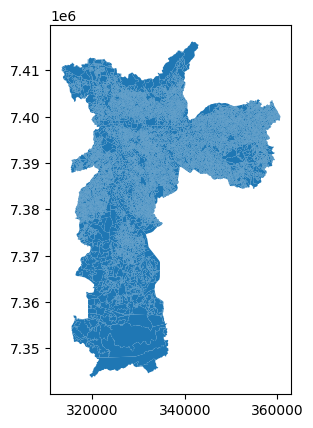

In [3]:
gdf.plot()

In [4]:
gdf

,id,setor_cens,populacao,area_hect,habit_hect,ano_densid,an_censo,geometry
0,32355,355030865000149,573.0,0.100683,5691.134318,2010,2010,"POLYGON ((317440.922 7389005.647, 317403.592 7..."
1,32356,355030865000148,156.0,0.226534,688.637730,2010,2010,"POLYGON ((317403.592 7389019.58, 317388.527 73..."
2,24960,355030864000087,350.0,5.201065,67.293912,2010,2010,"POLYGON ((345980.396 7398089.85, 345984.765 73..."
3,24961,355030864000088,306.0,2.962862,103.278515,2010,2010,"POLYGON ((346080.561 7398266.434, 346014.992 7..."
4,24964,355030864000058,997.0,8.876239,112.322347,2010,2010,"POLYGON ((346465.106 7398670.813, 346491.061 7..."
...,...,...,...,...,...,...,...,...
18970,32410,355030865000115,300.0,0.160967,1863.739811,2010,2010,"POLYGON ((318667.232 7389244.667, 318690.797 7..."
18971,32411,355030865000114,271.0,0.403145,672.214354,2010,2010,"POLYGON ((318626.172 7389411.076, 318681.418 7..."
18972,32414,355030867000146,328.0,0.478852,684.972183,2010,2010,"POLYGON ((320496.925 7393384.14, 320511.927 73..."
18973,32416,355030867000151,325.0,0.894295,363.414630,2010,2010,"POLYGON ((320569.425 7393358.668, 320614.965 7..."


In [5]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18975 entries, 0 to 18974
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          18975 non-null  object  
 1   setor_cens  18975 non-null  object  
 2   populacao   18384 non-null  float64 
 3   area_hect   18975 non-null  float64 
 4   habit_hect  18384 non-null  float64 
 5   ano_densid  18975 non-null  int32   
 6   an_censo    18975 non-null  int32   
 7   geometry    18975 non-null  geometry
dtypes: float64(3), geometry(1), int32(2), object(2)
memory usage: 1.0+ MB


In [14]:
gdf_novo = gdf.copy()

In [19]:
gdf_novo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18975 entries, 0 to 18974
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           18975 non-null  object  
 1   setor_cens   18975 non-null  object  
 2   populacao    18384 non-null  float64 
 3   area_hect    18975 non-null  float64 
 4   habit_hect   18384 non-null  float64 
 5   ano_densid   18975 non-null  int32   
 6   an_censo     18975 non-null  int32   
 7   geometry     18975 non-null  geometry
 8   centroide    18975 non-null  geometry
 9   centroide_x  18975 non-null  float64 
 10  centroide_y  18975 non-null  float64 
dtypes: float64(5), geometry(2), int32(2), object(2)
memory usage: 1.4+ MB


In [16]:
gdf_novo['geometry'] = gdf_novo['geometry'].astype(str)

C:\Users\prado\AppData\Local\Temp\ipykernel_29020\3055552666.py:1: UserWarning: Geometry column does not contain geometry.
  gdf_novo['geometry'] = gdf_novo['geometry'].astype(str)


In [17]:
import pandas as pd
from shapely import wkt

# Converter a coluna 'geometry' de texto para objeto Shapely
gdf_novo['geometry'] = gdf_novo['geometry'].apply(wkt.loads)

# Calcular o centroide do polígono
gdf_novo['centroide'] = gdf_novo['geometry'].apply(lambda geom: geom.centroid)

# Exibir as coordenadas do centroide
print(gdf_novo[['geometry', 'centroide_x', 'centroide_y']])


                                                geometry    centroide_x  \
0      POLYGON ((317440.922 7389005.647, 317403.592 7...  317435.536185   
1      POLYGON ((317403.592 7389019.58, 317388.527 73...  317436.931722   
2      POLYGON ((345980.396 7398089.85, 345984.765 73...  346156.546582   
3      POLYGON ((346080.561 7398266.434, 346014.992 7...  346111.267357   
4      POLYGON ((346465.106 7398670.813, 346491.061 7...  346606.223996   
...                                                  ...            ...   
18970  POLYGON ((318667.232 7389244.667, 318690.797 7...  318687.894696   
18971  POLYGON ((318626.172 7389411.076, 318681.418 7...  318668.826123   
18972  POLYGON ((320496.925 7393384.14, 320511.927 73...  320518.253634   
18973  POLYGON ((320569.425 7393358.668, 320614.965 7...  320638.448468   
18974  POLYGON ((320706.191 7393412.845, 320875.015 7...  320794.413519   

        centroide_y  
0      7.389022e+06  
1      7.389051e+06  
2      7.398150e+06  
3      7.39

In [18]:
gdf_novo

,id,setor_cens,populacao,area_hect,habit_hect,ano_densid,an_censo,geometry,centroide,centroide_x,centroide_y
0,32355,355030865000149,573.0,0.100683,5691.134318,2010,2010,"POLYGON ((317440.922 7389005.647, 317403.592 7...",POINT (317435.536 7389021.8),317435.536185,7.389022e+06
1,32356,355030865000148,156.0,0.226534,688.637730,2010,2010,"POLYGON ((317403.592 7389019.58, 317388.527 73...",POINT (317436.932 7389051.355),317436.931722,7.389051e+06
2,24960,355030864000087,350.0,5.201065,67.293912,2010,2010,"POLYGON ((345980.396 7398089.85, 345984.765 73...",POINT (346156.547 7398150.357),346156.546582,7.398150e+06
3,24961,355030864000088,306.0,2.962862,103.278515,2010,2010,"POLYGON ((346080.561 7398266.434, 346014.992 7...",POINT (346111.267 7398349.948),346111.267357,7.398350e+06
4,24964,355030864000058,997.0,8.876239,112.322347,2010,2010,"POLYGON ((346465.106 7398670.813, 346491.061 7...",POINT (346606.224 7398548.491),346606.223996,7.398548e+06
...,...,...,...,...,...,...,...,...,...,...,...
18970,32410,355030865000115,300.0,0.160967,1863.739811,2010,2010,"POLYGON ((318667.232 7389244.667, 318690.797 7...",POINT (318687.895 7389219.997),318687.894696,7.389220e+06
18971,32411,355030865000114,271.0,0.403145,672.214354,2010,2010,"POLYGON ((318626.172 7389411.076, 318681.418 7...",POINT (318668.826 7389396.889),318668.826123,7.389397e+06
18972,32414,355030867000146,328.0,0.478852,684.972183,2010,2010,"POLYGON ((320496.925 7393384.14, 320511.927 73...",POINT (320518.254 7393353.88),320518.253634,7.393354e+06
18973,32416,355030867000151,325.0,0.894295,363.414630,2010,2010,"POLYGON ((320569.425 7393358.668, 320614.965 7...",POINT (320638.448 7393394.893),320638.448468,7.393395e+06


In [20]:
gdf_novo['centroide'] = gdf_novo['centroide'].astype(str)

In [21]:
from pyproj import Proj
import re

# Definindo o sistema de coordenadas UTM zona 23S
utm_proj = Proj(proj='utm', zone=23, south=True, ellps='WGS84')

# Função para extrair coordenadas e converter para latitude/longitude
def utm_para_latlon(geometry):
    match = re.match(r'POINT \((\d+\.\d+) (\d+\.\d+)\)', geometry)
    if match:
        easting = float(match.group(1))
        northing = float(match.group(2))
        lon, lat = utm_proj(easting, northing, inverse=True)
        return lat, lon

# Aplicar a função para criar as novas colunas 'Latitude' e 'Longitude'
gdf_novo['Latitude Centroide'], gdf_novo['Longitude Centroide'] = zip(*gdf_novo['centroide'].apply(utm_para_latlon))

# Exibindo o DataFrame atualizado
gdf_novo

,id,setor_cens,populacao,area_hect,habit_hect,ano_densid,an_censo,geometry,centroide,centroide_x,centroide_y,Latitude Centroide,Longitude Centroide
0,32355,355030865000149,573.0,0.100683,5691.134318,2010,2010,"POLYGON ((317440.922 7389005.647, 317403.592 7...",POINT (317435.536185 7389021.800126),317435.536185,7.389022e+06,-23.599048,-46.789233
1,32356,355030865000148,156.0,0.226534,688.637730,2010,2010,"POLYGON ((317403.592 7389019.58, 317388.527 73...",POINT (317436.931722 7389051.355297),317436.931722,7.389051e+06,-23.598782,-46.789215
2,24960,355030864000087,350.0,5.201065,67.293912,2010,2010,"POLYGON ((345980.396 7398089.85, 345984.765 73...",POINT (346156.546582 7398150.356541),346156.546582,7.398150e+06,-23.519609,-46.506893
3,24961,355030864000088,306.0,2.962862,103.278515,2010,2010,"POLYGON ((346080.561 7398266.434, 346014.992 7...",POINT (346111.267357 7398349.948343),346111.267357,7.398350e+06,-23.517802,-46.507316
4,24964,355030864000058,997.0,8.876239,112.322347,2010,2010,"POLYGON ((346465.106 7398670.813, 346491.061 7...",POINT (346606.223996 7398548.491438),346606.223996,7.398548e+06,-23.516056,-46.502449
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18970,32410,355030865000115,300.0,0.160967,1863.739811,2010,2010,"POLYGON ((318667.232 7389244.667, 318690.797 7...",POINT (318687.894696 7389219.99696),318687.894696,7.389220e+06,-23.597400,-46.776939
18971,32411,355030865000114,271.0,0.403145,672.214354,2010,2010,"POLYGON ((318626.172 7389411.076, 318681.418 7...",POINT (318668.826123 7389396.889165),318668.826123,7.389397e+06,-23.595801,-46.777105
18972,32414,355030867000146,328.0,0.478852,684.972183,2010,2010,"POLYGON ((320496.925 7393384.14, 320511.927 73...",POINT (320518.253634 7393353.880206),320518.253634,7.393354e+06,-23.560281,-46.758510
18973,32416,355030867000151,325.0,0.894295,363.414630,2010,2010,"POLYGON ((320569.425 7393358.668, 320614.965 7...",POINT (320638.448468 7393394.893223),320638.448468,7.393395e+06,-23.559924,-46.757328


In [34]:
import folium
from folium.plugins import MarkerCluster

# Criando um mapa inicial com as coordenadas de SP
map = folium.Map(location=[-23.5505, -46.6333], zoom_start=10)

# Adicionando um marcador ao mapa
marker_cluster = MarkerCluster().add_to(map)

# Iterando pelas Lat/Lon para adicionar ao mapa
folium.Marker(
    location=[-23.519050, -46.390113], popup=['ESTAB_SA']).add_to(map)
map

In [32]:
teste = gdf_novo.query('habit_hect > 10000')

In [33]:
teste

,id,setor_cens,populacao,area_hect,habit_hect,ano_densid,an_censo,geometry,centroide,centroide_x,centroide_y,Latitude Centroide,Longitude Centroide
581,14327,355030836000183,1057.0,0.066585,15874.382753,2010,2010,"POLYGON ((358065.962 7398320.817, 358065.938 7...",POINT (358080.092912 7398332.58117),358080.092912,7.398333e+06,-23.519050,-46.390113
3983,27649,355030822000308,862.0,0.052641,16375.166528,2010,2010,"POLYGON ((329497.014 7381710.554, 329496.779 7...",POINT (329510.105874 7381720.779337),329510.105874,7.381721e+06,-23.666287,-46.671773
5448,30683,355030824000052,1347.0,0.125576,10726.588556,2010,2010,"POLYGON ((347535.257 7391799.134, 347569.633 7...",POINT (347553.832014 7391782.243964),347553.832014,7.391782e+06,-23.577243,-46.493860
10051,14306,355030836000128,592.0,0.048001,12332.981268,2010,2010,"POLYGON ((359484.016 7399123.386, 359484.015 7...",POINT (359495.146842 7399134.068105),359495.146842,7.399134e+06,-23.511935,-46.376180
10064,14328,355030836000181,653.0,0.060718,10754.656857,2010,2010,"POLYGON ((358212.003 7398150.361, 358212.049 7...",POINT (358223.233001 7398163.803615),358223.233001,7.398164e+06,-23.520586,-46.388727
10065,14330,355030836000182,657.0,0.052921,12414.710831,2010,2010,"POLYGON ((358315.968 7398170.303, 358338.53 73...",POINT (358327.953174 7398158.767614),358327.953174,7.398159e+06,-23.520641,-46.387702
10170,14516,355030876000276,540.0,0.033880,15938.390638,2010,2010,"POLYGON ((346103.894 7386912.255, 346103.923 7...",POINT (346114.010799 7386920.557197),346114.010799,7.386921e+06,-23.621006,-46.508468
14084,29213,355030807000092,532.0,0.047316,11243.467595,2010,2010,"POLYGON ((331785.416 7394187.91, 331793.499 73...",POINT (331801.988916 7394191.186069),331801.988916,7.394191e+06,-23.553932,-46.647898
14884,30732,355030876000257,814.0,0.026824,30345.556016,2010,2010,"POLYGON ((344468.419 7390631.662, 344468.336 7...",POINT (344476.20324 7390640.365553),344476.203240,7.390640e+06,-23.587261,-46.524129
